In [20]:
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [11]:
df = pd.read_csv('clothes-data.csv',header= None)

In [12]:
df.head(10)

,0,1
0,plain-dark-blue-shirt,grey-chinos
1,white-printed-shit,navy-blue-chinos
2,light-blue-hoodie,black-jeans
3,plain-black-shirt,grey-chinos
4,white-printed-shit,navy-blue-chinos
5,light-green-Tshirt,black-jeans
6,red-hoddie,black-jeans
7,plain-black-shirt,grey-chinos
8,plain-light-blue-shirt,black-chinos
9,plain-white-shirt,khaki-chinos


In [13]:
transactions = []
for i in range(0, 23):
  transactions.append([str(df.values[i,j]) for j in range(0,2)])

In [14]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [15]:
results = list(rules)

In [16]:
results

[RelationRecord(items=frozenset({'black-chinos', 'plain-light-blue-shirt'}), support=0.043478260869565216, ordered_statistics=[OrderedStatistic(items_base=frozenset({'black-chinos'}), items_add=frozenset({'plain-light-blue-shirt'}), confidence=0.3333333333333333, lift=3.833333333333333), OrderedStatistic(items_base=frozenset({'plain-light-blue-shirt'}), items_add=frozenset({'black-chinos'}), confidence=0.5, lift=3.8333333333333335)]),
 RelationRecord(items=frozenset({'black-chinos', 'plain-maroon-shirt'}), support=0.043478260869565216, ordered_statistics=[OrderedStatistic(items_base=frozenset({'black-chinos'}), items_add=frozenset({'plain-maroon-shirt'}), confidence=0.3333333333333333, lift=3.833333333333333), OrderedStatistic(items_base=frozenset({'plain-maroon-shirt'}), items_add=frozenset({'black-chinos'}), confidence=0.5, lift=3.8333333333333335)]),
 RelationRecord(items=frozenset({'black-jeans', 'light-blue-hoodie'}), support=0.043478260869565216, ordered_statistics=[OrderedStatis

In [17]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [18]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,black-chinos,plain-light-blue-shirt,0.043478,0.333333,3.833333
1,black-chinos,plain-maroon-shirt,0.043478,0.333333,3.833333
2,black-jeans,light-blue-hoodie,0.043478,0.333333,7.666667
3,black-jeans,light-green-Tshirt,0.043478,0.333333,7.666667
4,black-jeans,red-hoddie,0.043478,0.333333,7.666667
5,blue-chinos,plain-pink-shirt,0.043478,1.000000,23.000000
6,checkered-blue-shirt,khaki-chinos,0.043478,1.000000,11.500000
7,cream-pants,dark-green-shirt,0.043478,0.500000,11.500000
8,cream-pants,plain-black-shirt,0.043478,0.500000,3.833333
9,dark-brown-pant,plain-white-shirt,0.043478,1.000000,3.833333


In [19]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
5,blue-chinos,plain-pink-shirt,0.043478,1.000000,23.000000
15,plain-navy-blue-shirt,white-chinos,0.043478,1.000000,23.000000
6,checkered-blue-shirt,khaki-chinos,0.043478,1.000000,11.500000
7,cream-pants,dark-green-shirt,0.043478,0.500000,11.500000
2,black-jeans,light-blue-hoodie,0.043478,0.333333,7.666667
3,black-jeans,light-green-Tshirt,0.043478,0.333333,7.666667
4,black-jeans,red-hoddie,0.043478,0.333333,7.666667
14,navy-blue-chinos,white-printed-shit,0.086957,0.666667,7.666667
12,grey-chinos,plain-dark-blue-shirt,0.043478,0.200000,4.600000
8,cream-pants,plain-black-shirt,0.043478,0.500000,3.833333


<AxesSubplot:xlabel='Support', ylabel='Density'>

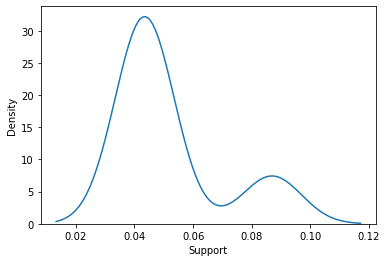

In [26]:
sns.kdeplot(data=resultsinDataFrame,x='Support')

<AxesSubplot:xlabel='Lift', ylabel='Density'>

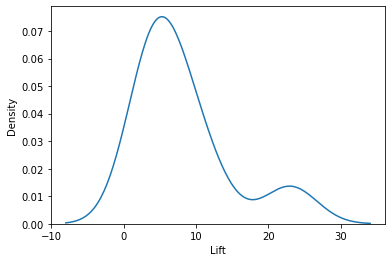

In [27]:
sns.kdeplot(data=resultsinDataFrame,x='Lift')